In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Exploratory data analysis

In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###### we drop the loan id

In [7]:
data=data.drop('Loan_ID',axis=1)

In [8]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### fill missing values or nan values

In [9]:
a = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']


for i in a:
    data[i].fillna(data[i].mode()[0], inplace = True)

In [10]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [11]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### all null values are filled 

### values count of all features and visualization for all features

<AxesSubplot:xlabel='Married', ylabel='count'>

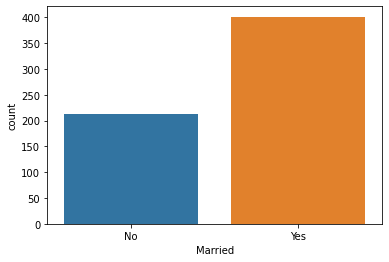

In [12]:
data['Married'].value_counts()
sns.countplot(x=data['Married'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

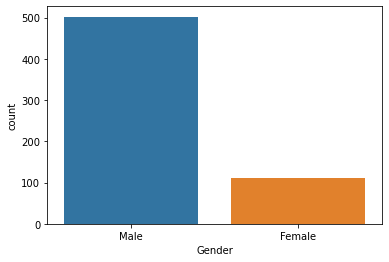

In [14]:
data['Gender'].value_counts()
sns.countplot(x=data['Gender'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

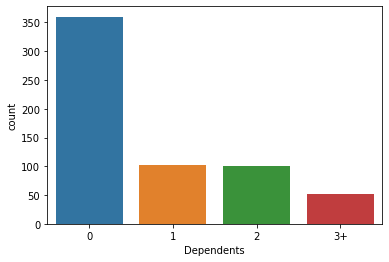

In [15]:
data['Dependents'].value_counts()
sns.countplot(x=data['Dependents'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

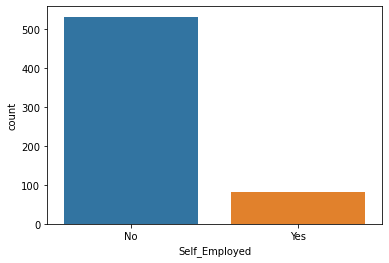

In [16]:
data['Self_Employed'].value_counts()
sns.countplot(x=data['Self_Employed'])

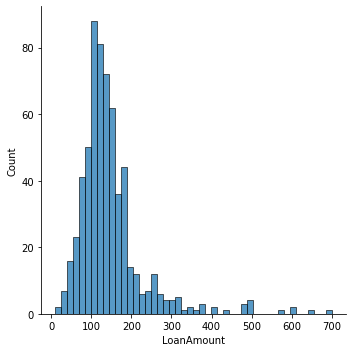

In [17]:
data['LoanAmount'].value_counts()
sns.displot(x=data['LoanAmount'])

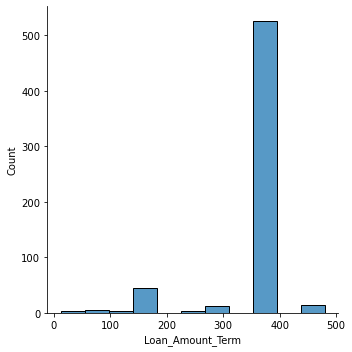

In [18]:
data['Loan_Amount_Term'] .value_counts()
sns.displot(x=data['Loan_Amount_Term'] )

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

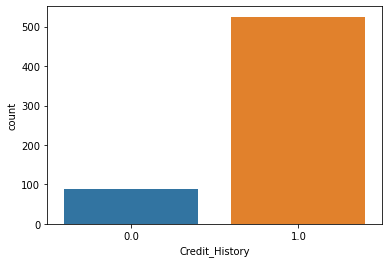

In [19]:
data['Credit_History'] .value_counts()
sns.countplot(x=data['Credit_History'] )

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

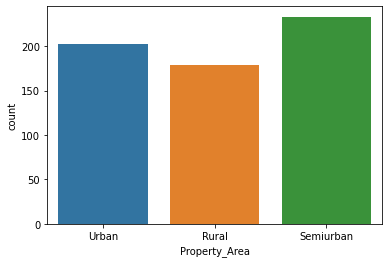

In [20]:
data['Property_Area'] .value_counts()
sns.countplot(x=data['Property_Area'] )

### apply label encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

elements = data.select_dtypes(include=['object']).columns

elements

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
for i in elements:
    data[i] = enc.fit_transform(data[i])

In [23]:
data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [24]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


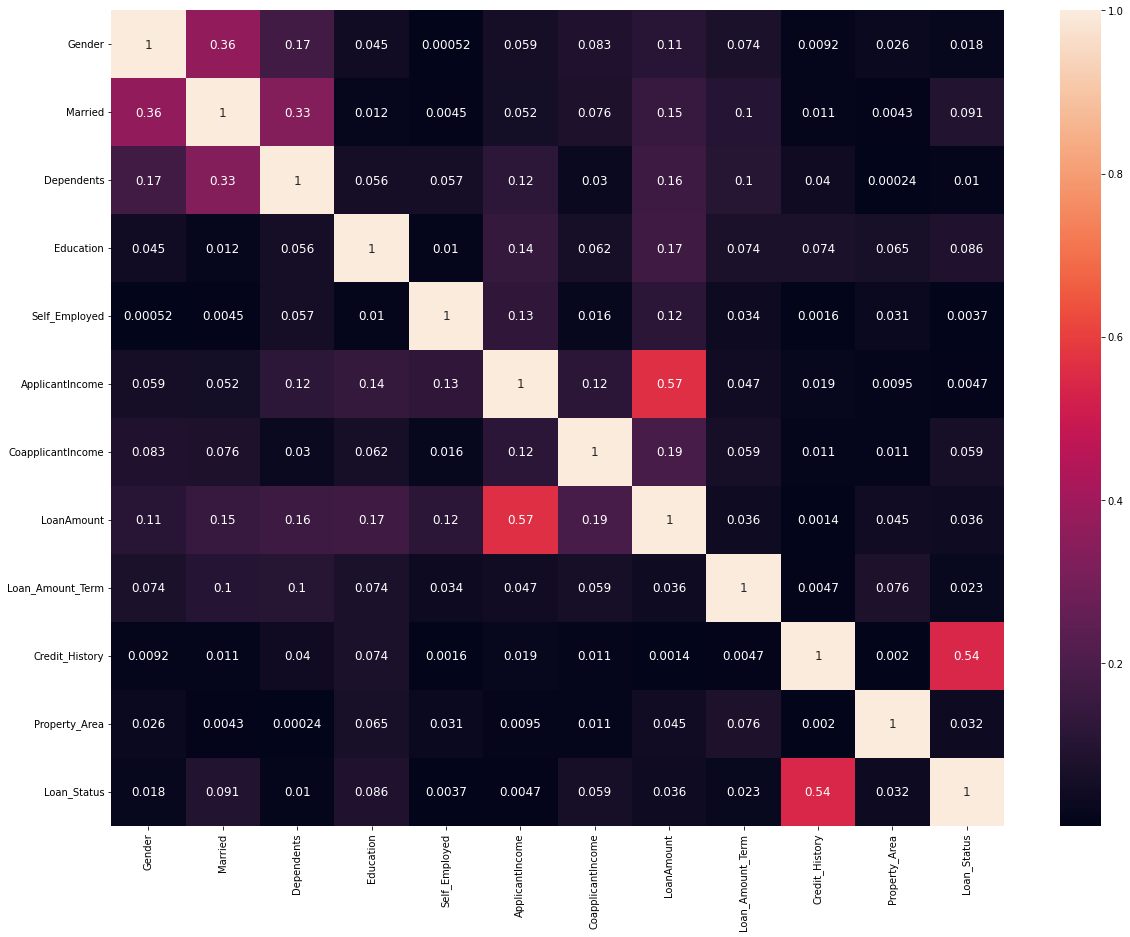

In [25]:
data_corr = data.corr().abs()

plt.figure(figsize = (20,15))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

## Checking Skewness and outliers


In [26]:
x = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [27]:
print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [28]:
x.skew().sort_values(ascending = False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.726601
Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
Property_Area       -0.066196
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
Loan_Amount_Term    -2.402112
dtype: float64

#### in coapplication income and application income have skewness

In [29]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [30]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

Self_Employed        2.159796
Education            1.367622
Dependents           0.441404
Loan_Amount_Term     0.392571
LoanAmount           0.024376
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
Property_Area       -0.158267
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
dtype: float64

In [31]:
x = pd.DataFrame(x_new, columns = x.columns)

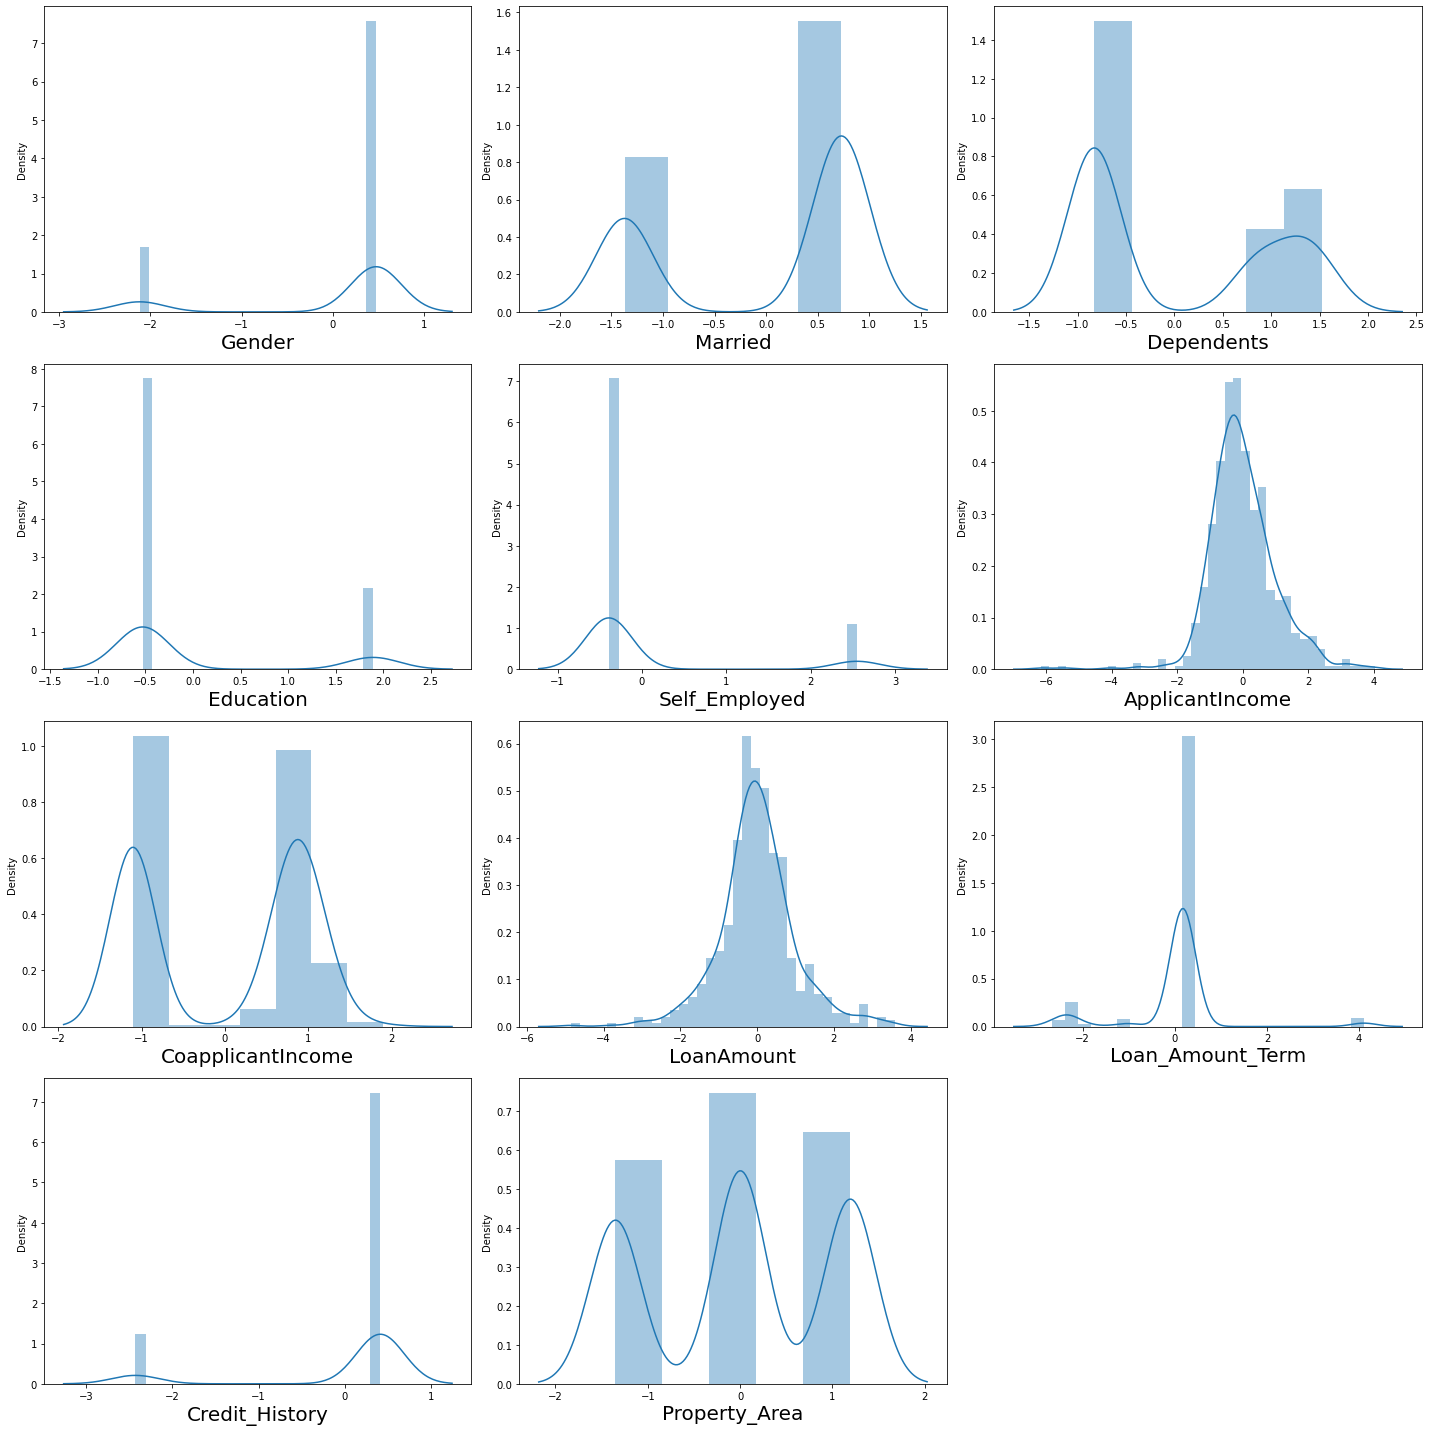

In [32]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

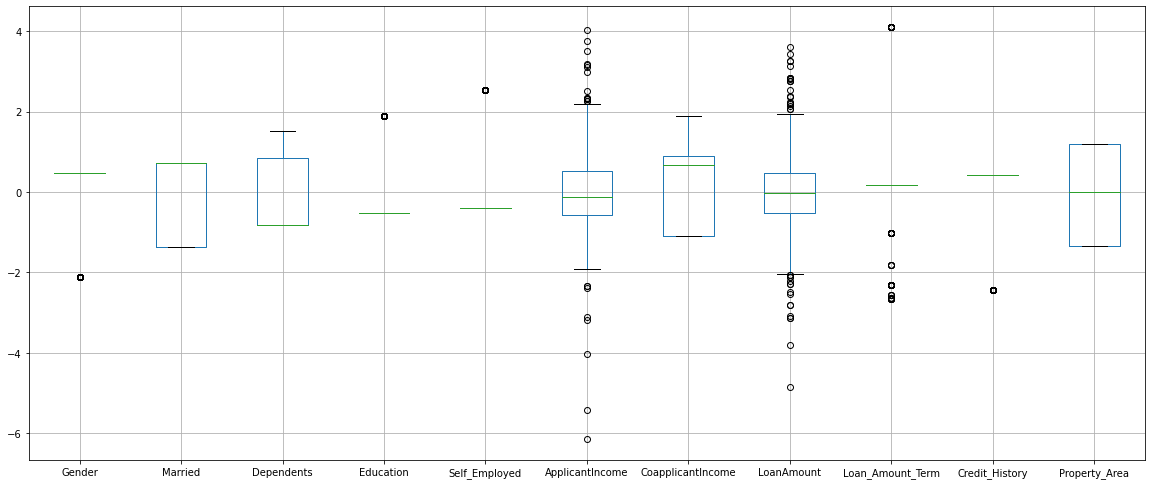

In [33]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [34]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome     True
LoanAmount           False
Loan_Amount_Term     False
Credit_History        True
Property_Area         True
dtype: bool
****************************************
Low Side Outliers Present
Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome     True
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area         True
dtype: bool


In [35]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [36]:
ApplicantIncome_high = q3.ApplicantIncome + (1.5 * iqr.ApplicantIncome)

# Check the Indexes which have higher values

index1 = np.where(x['ApplicantIncome']> ApplicantIncome_high)

x = x.drop(x['ApplicantIncome'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(600, 11)
(600,)


In [37]:
LoanAmount_high = q3.LoanAmount + (1.5 * iqr.LoanAmount)

# Check the Indexes which have higher values

index1 = np.where(x['LoanAmount']> LoanAmount_high)

x = x.drop(x['LoanAmount'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(589, 11)
(589,)


In [39]:
ApplicantIncome_low = q1.ApplicantIncome - (1.5 * iqr.ApplicantIncome)

# Check the Indexes which have higher values

index1 = np.where(x['ApplicantIncome']< ApplicantIncome_low)

x = x.drop(x['ApplicantIncome'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(582, 11)
(582,)


In [41]:
LoanAmount_low = q1.LoanAmount - (1.5 * iqr.LoanAmount)

# Check the Indexes which have higher values

index1 = np.where(x['LoanAmount']< LoanAmount_low)

x = x.drop(x['LoanAmount'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(566, 11)
(566,)


In [42]:
# Percentage Loss of Data

Data_loss = ((614-566)/614)*100

Data_loss

7.81758957654723

In [43]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome       True
CoapplicantIncome     True
LoanAmount            True
Loan_Amount_Term     False
Credit_History        True
Property_Area         True
dtype: bool
****************************************
Low Side Outliers Present
Gender               True
Married              True
Dependents           True
Education            True
Self_Employed        True
ApplicantIncome      True
CoapplicantIncome    True
LoanAmount           True
Loan_Amount_Term     True
Credit_History       True
Property_Area        True
dtype: bool


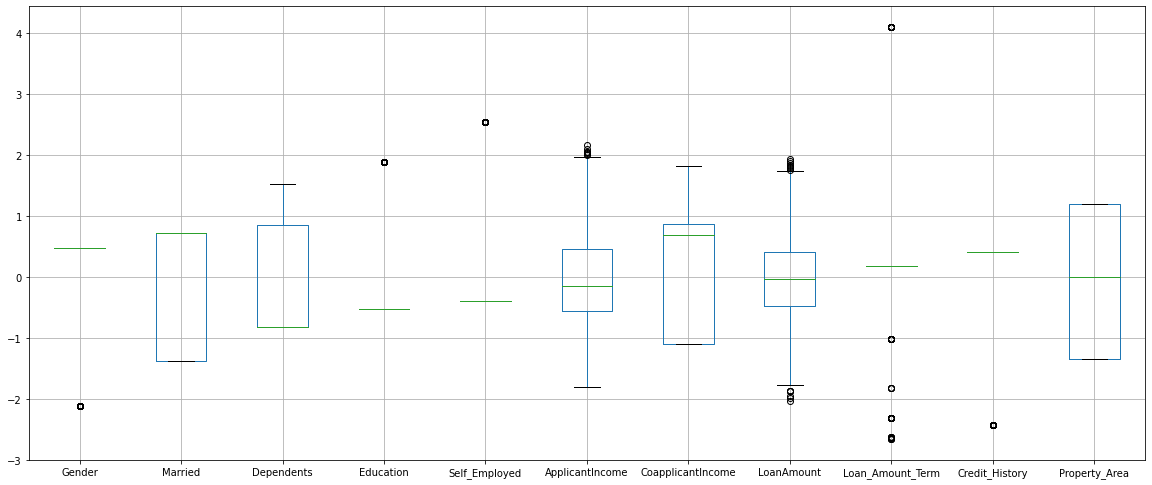

In [44]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

#### Checking Multicollinearity

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.197577,Gender
1,1.415210,Married
2,1.193961,Dependents
3,1.065112,Education
4,1.068412,Self_Employed
5,1.947912,ApplicantIncome
6,1.624747,CoapplicantIncome
7,1.634520,LoanAmount
8,1.035360,Loan_Amount_Term
9,1.009938,Credit_History


### Model Building

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [49]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range(1,5000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    reg = LogisticRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('accuracy score', acc, 'random_state', i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy score', maxAccu, 'random_state', i)

accuracy score 0.8380281690140845 random_state 1
accuracy score 0.8380281690140845 random_state 1
accuracy score 0.7676056338028169 random_state 2
accuracy score 0.7605633802816901 random_state 3
accuracy score 0.823943661971831 random_state 4
accuracy score 0.8169014084507042 random_state 5
accuracy score 0.795774647887324 random_state 6
accuracy score 0.8309859154929577 random_state 7
accuracy score 0.8450704225352113 random_state 8
accuracy score 0.8450704225352113 random_state 8
accuracy score 0.8873239436619719 random_state 9
accuracy score 0.8873239436619719 random_state 9
accuracy score 0.7816901408450704 random_state 10
accuracy score 0.8098591549295775 random_state 11
accuracy score 0.823943661971831 random_state 12
accuracy score 0.852112676056338 random_state 13
accuracy score 0.8380281690140845 random_state 14
accuracy score 0.7816901408450704 random_state 15
accuracy score 0.8380281690140845 random_state 16
accuracy score 0.8028169014084507 random_state 17
accuracy score 0

accuracy score 0.8450704225352113 random_state 178
accuracy score 0.823943661971831 random_state 179
accuracy score 0.8098591549295775 random_state 180
accuracy score 0.8380281690140845 random_state 181
accuracy score 0.8169014084507042 random_state 182
accuracy score 0.8169014084507042 random_state 183
accuracy score 0.8169014084507042 random_state 184
accuracy score 0.8028169014084507 random_state 185
accuracy score 0.8450704225352113 random_state 186
accuracy score 0.7605633802816901 random_state 187
accuracy score 0.7464788732394366 random_state 188
accuracy score 0.7816901408450704 random_state 189
accuracy score 0.8098591549295775 random_state 190
accuracy score 0.8380281690140845 random_state 191
accuracy score 0.795774647887324 random_state 192
accuracy score 0.8098591549295775 random_state 193
accuracy score 0.8591549295774648 random_state 194
accuracy score 0.795774647887324 random_state 195
accuracy score 0.823943661971831 random_state 196
accuracy score 0.8169014084507042 r

accuracy score 0.8450704225352113 random_state 343
accuracy score 0.795774647887324 random_state 344
accuracy score 0.8309859154929577 random_state 345
accuracy score 0.8380281690140845 random_state 346
accuracy score 0.8098591549295775 random_state 347
accuracy score 0.8169014084507042 random_state 348
accuracy score 0.8028169014084507 random_state 349
accuracy score 0.8028169014084507 random_state 350
accuracy score 0.8380281690140845 random_state 351
accuracy score 0.8028169014084507 random_state 352
accuracy score 0.7605633802816901 random_state 353
accuracy score 0.823943661971831 random_state 354
accuracy score 0.795774647887324 random_state 355
accuracy score 0.7676056338028169 random_state 356
accuracy score 0.8098591549295775 random_state 357
accuracy score 0.7746478873239436 random_state 358
accuracy score 0.795774647887324 random_state 359
accuracy score 0.795774647887324 random_state 360
accuracy score 0.823943661971831 random_state 361
accuracy score 0.8098591549295775 ran

accuracy score 0.7887323943661971 random_state 510
accuracy score 0.8380281690140845 random_state 511
accuracy score 0.8169014084507042 random_state 512
accuracy score 0.8028169014084507 random_state 513
accuracy score 0.8380281690140845 random_state 514
accuracy score 0.7676056338028169 random_state 515
accuracy score 0.7816901408450704 random_state 516
accuracy score 0.8380281690140845 random_state 517
accuracy score 0.8028169014084507 random_state 518
accuracy score 0.7746478873239436 random_state 519
accuracy score 0.795774647887324 random_state 520
accuracy score 0.8450704225352113 random_state 521
accuracy score 0.795774647887324 random_state 522
accuracy score 0.7605633802816901 random_state 523
accuracy score 0.8380281690140845 random_state 524
accuracy score 0.7605633802816901 random_state 525
accuracy score 0.7887323943661971 random_state 526
accuracy score 0.823943661971831 random_state 527
accuracy score 0.8169014084507042 random_state 528
accuracy score 0.8028169014084507 

accuracy score 0.8450704225352113 random_state 680
accuracy score 0.8450704225352113 random_state 681
accuracy score 0.7746478873239436 random_state 682
accuracy score 0.8098591549295775 random_state 683
accuracy score 0.7816901408450704 random_state 684
accuracy score 0.8309859154929577 random_state 685
accuracy score 0.8028169014084507 random_state 686
accuracy score 0.795774647887324 random_state 687
accuracy score 0.8028169014084507 random_state 688
accuracy score 0.7816901408450704 random_state 689
accuracy score 0.8309859154929577 random_state 690
accuracy score 0.8591549295774648 random_state 691
accuracy score 0.795774647887324 random_state 692
accuracy score 0.8169014084507042 random_state 693
accuracy score 0.8380281690140845 random_state 694
accuracy score 0.7887323943661971 random_state 695
accuracy score 0.8380281690140845 random_state 696
accuracy score 0.8028169014084507 random_state 697
accuracy score 0.8380281690140845 random_state 698
accuracy score 0.823943661971831 

accuracy score 0.8380281690140845 random_state 845
accuracy score 0.7746478873239436 random_state 846
accuracy score 0.8028169014084507 random_state 847
accuracy score 0.8098591549295775 random_state 848
accuracy score 0.823943661971831 random_state 849
accuracy score 0.823943661971831 random_state 850
accuracy score 0.7464788732394366 random_state 851
accuracy score 0.8098591549295775 random_state 852
accuracy score 0.8309859154929577 random_state 853
accuracy score 0.8450704225352113 random_state 854
accuracy score 0.8098591549295775 random_state 855
accuracy score 0.7887323943661971 random_state 856
accuracy score 0.8169014084507042 random_state 857
accuracy score 0.8309859154929577 random_state 858
accuracy score 0.7676056338028169 random_state 859
accuracy score 0.7887323943661971 random_state 860
accuracy score 0.852112676056338 random_state 861
accuracy score 0.8169014084507042 random_state 862
accuracy score 0.8028169014084507 random_state 863
accuracy score 0.7887323943661971 

accuracy score 0.7816901408450704 random_state 1011
accuracy score 0.8591549295774648 random_state 1012
accuracy score 0.8028169014084507 random_state 1013
accuracy score 0.8028169014084507 random_state 1014
accuracy score 0.8028169014084507 random_state 1015
accuracy score 0.8309859154929577 random_state 1016
accuracy score 0.852112676056338 random_state 1017
accuracy score 0.8098591549295775 random_state 1018
accuracy score 0.8169014084507042 random_state 1019
accuracy score 0.7887323943661971 random_state 1020
accuracy score 0.8661971830985915 random_state 1021
accuracy score 0.8309859154929577 random_state 1022
accuracy score 0.8169014084507042 random_state 1023
accuracy score 0.8309859154929577 random_state 1024
accuracy score 0.8098591549295775 random_state 1025
accuracy score 0.795774647887324 random_state 1026
accuracy score 0.8380281690140845 random_state 1027
accuracy score 0.7535211267605634 random_state 1028
accuracy score 0.7887323943661971 random_state 1029
accuracy score

accuracy score 0.8028169014084507 random_state 1177
accuracy score 0.8028169014084507 random_state 1178
accuracy score 0.8309859154929577 random_state 1179
accuracy score 0.795774647887324 random_state 1180
accuracy score 0.7535211267605634 random_state 1181
accuracy score 0.8309859154929577 random_state 1182
accuracy score 0.7605633802816901 random_state 1183
accuracy score 0.8802816901408451 random_state 1184
accuracy score 0.8028169014084507 random_state 1185
accuracy score 0.795774647887324 random_state 1186
accuracy score 0.8028169014084507 random_state 1187
accuracy score 0.8450704225352113 random_state 1188
accuracy score 0.7816901408450704 random_state 1189
accuracy score 0.795774647887324 random_state 1190
accuracy score 0.795774647887324 random_state 1191
accuracy score 0.8309859154929577 random_state 1192
accuracy score 0.7605633802816901 random_state 1193
accuracy score 0.7605633802816901 random_state 1194
accuracy score 0.823943661971831 random_state 1195
accuracy score 0.

accuracy score 0.7746478873239436 random_state 1345
accuracy score 0.7816901408450704 random_state 1346
accuracy score 0.8380281690140845 random_state 1347
accuracy score 0.8169014084507042 random_state 1348
accuracy score 0.8169014084507042 random_state 1349
accuracy score 0.8028169014084507 random_state 1350
accuracy score 0.8380281690140845 random_state 1351
accuracy score 0.7887323943661971 random_state 1352
accuracy score 0.8450704225352113 random_state 1353
accuracy score 0.8169014084507042 random_state 1354
accuracy score 0.8450704225352113 random_state 1355
accuracy score 0.8098591549295775 random_state 1356
accuracy score 0.7816901408450704 random_state 1357
accuracy score 0.8380281690140845 random_state 1358
accuracy score 0.8380281690140845 random_state 1359
accuracy score 0.8169014084507042 random_state 1360
accuracy score 0.852112676056338 random_state 1361
accuracy score 0.8309859154929577 random_state 1362
accuracy score 0.795774647887324 random_state 1363
accuracy score

accuracy score 0.8098591549295775 random_state 1516
accuracy score 0.8380281690140845 random_state 1517
accuracy score 0.8169014084507042 random_state 1518
accuracy score 0.8380281690140845 random_state 1519
accuracy score 0.8661971830985915 random_state 1520
accuracy score 0.852112676056338 random_state 1521
accuracy score 0.823943661971831 random_state 1522
accuracy score 0.8380281690140845 random_state 1523
accuracy score 0.8732394366197183 random_state 1524
accuracy score 0.823943661971831 random_state 1525
accuracy score 0.8309859154929577 random_state 1526
accuracy score 0.7746478873239436 random_state 1527
accuracy score 0.852112676056338 random_state 1528
accuracy score 0.823943661971831 random_state 1529
accuracy score 0.8309859154929577 random_state 1530
accuracy score 0.7887323943661971 random_state 1531
accuracy score 0.795774647887324 random_state 1532
accuracy score 0.8169014084507042 random_state 1533
accuracy score 0.8169014084507042 random_state 1534
accuracy score 0.8

accuracy score 0.8028169014084507 random_state 1685
accuracy score 0.7746478873239436 random_state 1686
accuracy score 0.7746478873239436 random_state 1687
accuracy score 0.7816901408450704 random_state 1688
accuracy score 0.852112676056338 random_state 1689
accuracy score 0.8098591549295775 random_state 1690
accuracy score 0.8450704225352113 random_state 1691
accuracy score 0.8098591549295775 random_state 1692
accuracy score 0.8309859154929577 random_state 1693
accuracy score 0.7676056338028169 random_state 1694
accuracy score 0.7605633802816901 random_state 1695
accuracy score 0.8732394366197183 random_state 1696
accuracy score 0.823943661971831 random_state 1697
accuracy score 0.823943661971831 random_state 1698
accuracy score 0.8169014084507042 random_state 1699
accuracy score 0.7464788732394366 random_state 1700
accuracy score 0.8028169014084507 random_state 1701
accuracy score 0.8450704225352113 random_state 1702
accuracy score 0.795774647887324 random_state 1703
accuracy score 0

accuracy score 0.8098591549295775 random_state 1854
accuracy score 0.8028169014084507 random_state 1855
accuracy score 0.7887323943661971 random_state 1856
accuracy score 0.7605633802816901 random_state 1857
accuracy score 0.795774647887324 random_state 1858
accuracy score 0.8380281690140845 random_state 1859
accuracy score 0.8380281690140845 random_state 1860
accuracy score 0.823943661971831 random_state 1861
accuracy score 0.8661971830985915 random_state 1862
accuracy score 0.795774647887324 random_state 1863
accuracy score 0.7676056338028169 random_state 1864
accuracy score 0.8028169014084507 random_state 1865
accuracy score 0.8169014084507042 random_state 1866
accuracy score 0.7323943661971831 random_state 1867
accuracy score 0.8028169014084507 random_state 1868
accuracy score 0.8450704225352113 random_state 1869
accuracy score 0.7816901408450704 random_state 1870
accuracy score 0.8309859154929577 random_state 1871
accuracy score 0.8380281690140845 random_state 1872
accuracy score 

accuracy score 0.823943661971831 random_state 2022
accuracy score 0.8309859154929577 random_state 2023
accuracy score 0.7676056338028169 random_state 2024
accuracy score 0.8098591549295775 random_state 2025
accuracy score 0.7816901408450704 random_state 2026
accuracy score 0.7887323943661971 random_state 2027
accuracy score 0.7605633802816901 random_state 2028
accuracy score 0.8661971830985915 random_state 2029
accuracy score 0.795774647887324 random_state 2030
accuracy score 0.8098591549295775 random_state 2031
accuracy score 0.8028169014084507 random_state 2032
accuracy score 0.795774647887324 random_state 2033
accuracy score 0.8169014084507042 random_state 2034
accuracy score 0.8661971830985915 random_state 2035
accuracy score 0.8591549295774648 random_state 2036
accuracy score 0.8309859154929577 random_state 2037
accuracy score 0.8028169014084507 random_state 2038
accuracy score 0.8309859154929577 random_state 2039
accuracy score 0.8098591549295775 random_state 2040
accuracy score 

accuracy score 0.795774647887324 random_state 2188
accuracy score 0.8309859154929577 random_state 2189
accuracy score 0.8098591549295775 random_state 2190
accuracy score 0.7816901408450704 random_state 2191
accuracy score 0.8169014084507042 random_state 2192
accuracy score 0.8169014084507042 random_state 2193
accuracy score 0.8309859154929577 random_state 2194
accuracy score 0.7605633802816901 random_state 2195
accuracy score 0.823943661971831 random_state 2196
accuracy score 0.8028169014084507 random_state 2197
accuracy score 0.8169014084507042 random_state 2198
accuracy score 0.7887323943661971 random_state 2199
accuracy score 0.8450704225352113 random_state 2200
accuracy score 0.8169014084507042 random_state 2201
accuracy score 0.8309859154929577 random_state 2202
accuracy score 0.795774647887324 random_state 2203
accuracy score 0.8380281690140845 random_state 2204
accuracy score 0.8169014084507042 random_state 2205
accuracy score 0.8098591549295775 random_state 2206
accuracy score 

accuracy score 0.8309859154929577 random_state 2355
accuracy score 0.7746478873239436 random_state 2356
accuracy score 0.7676056338028169 random_state 2357
accuracy score 0.8028169014084507 random_state 2358
accuracy score 0.8169014084507042 random_state 2359
accuracy score 0.7887323943661971 random_state 2360
accuracy score 0.8380281690140845 random_state 2361
accuracy score 0.8169014084507042 random_state 2362
accuracy score 0.8309859154929577 random_state 2363
accuracy score 0.8098591549295775 random_state 2364
accuracy score 0.795774647887324 random_state 2365
accuracy score 0.8028169014084507 random_state 2366
accuracy score 0.7816901408450704 random_state 2367
accuracy score 0.8169014084507042 random_state 2368
accuracy score 0.7887323943661971 random_state 2369
accuracy score 0.7887323943661971 random_state 2370
accuracy score 0.795774647887324 random_state 2371
accuracy score 0.7816901408450704 random_state 2372
accuracy score 0.7746478873239436 random_state 2373
accuracy score

accuracy score 0.795774647887324 random_state 2522
accuracy score 0.8169014084507042 random_state 2523
accuracy score 0.7887323943661971 random_state 2524
accuracy score 0.8028169014084507 random_state 2525
accuracy score 0.7746478873239436 random_state 2526
accuracy score 0.823943661971831 random_state 2527
accuracy score 0.795774647887324 random_state 2528
accuracy score 0.795774647887324 random_state 2529
accuracy score 0.7676056338028169 random_state 2530
accuracy score 0.823943661971831 random_state 2531
accuracy score 0.8380281690140845 random_state 2532
accuracy score 0.852112676056338 random_state 2533
accuracy score 0.8028169014084507 random_state 2534
accuracy score 0.7746478873239436 random_state 2535
accuracy score 0.8380281690140845 random_state 2536
accuracy score 0.7887323943661971 random_state 2537
accuracy score 0.7746478873239436 random_state 2538
accuracy score 0.8028169014084507 random_state 2539
accuracy score 0.8169014084507042 random_state 2540
accuracy score 0.8

accuracy score 0.7816901408450704 random_state 2691
accuracy score 0.8732394366197183 random_state 2692
accuracy score 0.8380281690140845 random_state 2693
accuracy score 0.8450704225352113 random_state 2694
accuracy score 0.8098591549295775 random_state 2695
accuracy score 0.8309859154929577 random_state 2696
accuracy score 0.7676056338028169 random_state 2697
accuracy score 0.795774647887324 random_state 2698
accuracy score 0.795774647887324 random_state 2699
accuracy score 0.8098591549295775 random_state 2700
accuracy score 0.8380281690140845 random_state 2701
accuracy score 0.8098591549295775 random_state 2702
accuracy score 0.7887323943661971 random_state 2703
accuracy score 0.795774647887324 random_state 2704
accuracy score 0.8169014084507042 random_state 2705
accuracy score 0.8309859154929577 random_state 2706
accuracy score 0.8098591549295775 random_state 2707
accuracy score 0.8309859154929577 random_state 2708
accuracy score 0.7676056338028169 random_state 2709
accuracy score 

accuracy score 0.795774647887324 random_state 2861
accuracy score 0.823943661971831 random_state 2862
accuracy score 0.8169014084507042 random_state 2863
accuracy score 0.8309859154929577 random_state 2864
accuracy score 0.8380281690140845 random_state 2865
accuracy score 0.7535211267605634 random_state 2866
accuracy score 0.8028169014084507 random_state 2867
accuracy score 0.823943661971831 random_state 2868
accuracy score 0.8802816901408451 random_state 2869
accuracy score 0.8661971830985915 random_state 2870
accuracy score 0.795774647887324 random_state 2871
accuracy score 0.8450704225352113 random_state 2872
accuracy score 0.7816901408450704 random_state 2873
accuracy score 0.8309859154929577 random_state 2874
accuracy score 0.7887323943661971 random_state 2875
accuracy score 0.8591549295774648 random_state 2876
accuracy score 0.823943661971831 random_state 2877
accuracy score 0.7746478873239436 random_state 2878
accuracy score 0.8098591549295775 random_state 2879
accuracy score 0.

accuracy score 0.7676056338028169 random_state 3028
accuracy score 0.8098591549295775 random_state 3029
accuracy score 0.8380281690140845 random_state 3030
accuracy score 0.852112676056338 random_state 3031
accuracy score 0.7816901408450704 random_state 3032
accuracy score 0.8098591549295775 random_state 3033
accuracy score 0.8380281690140845 random_state 3034
accuracy score 0.8309859154929577 random_state 3035
accuracy score 0.8169014084507042 random_state 3036
accuracy score 0.795774647887324 random_state 3037
accuracy score 0.8098591549295775 random_state 3038
accuracy score 0.7605633802816901 random_state 3039
accuracy score 0.8098591549295775 random_state 3040
accuracy score 0.8098591549295775 random_state 3041
accuracy score 0.7887323943661971 random_state 3042
accuracy score 0.8098591549295775 random_state 3043
accuracy score 0.8169014084507042 random_state 3044
accuracy score 0.7887323943661971 random_state 3045
accuracy score 0.8450704225352113 random_state 3046
accuracy score

accuracy score 0.852112676056338 random_state 3195
accuracy score 0.8169014084507042 random_state 3196
accuracy score 0.8098591549295775 random_state 3197
accuracy score 0.795774647887324 random_state 3198
accuracy score 0.8098591549295775 random_state 3199
accuracy score 0.8450704225352113 random_state 3200
accuracy score 0.7676056338028169 random_state 3201
accuracy score 0.7746478873239436 random_state 3202
accuracy score 0.7887323943661971 random_state 3203
accuracy score 0.8380281690140845 random_state 3204
accuracy score 0.795774647887324 random_state 3205
accuracy score 0.8098591549295775 random_state 3206
accuracy score 0.7816901408450704 random_state 3207
accuracy score 0.8661971830985915 random_state 3208
accuracy score 0.7816901408450704 random_state 3209
accuracy score 0.795774647887324 random_state 3210
accuracy score 0.8591549295774648 random_state 3211
accuracy score 0.823943661971831 random_state 3212
accuracy score 0.8309859154929577 random_state 3213
accuracy score 0.

accuracy score 0.8309859154929577 random_state 3359
accuracy score 0.8450704225352113 random_state 3360
accuracy score 0.8028169014084507 random_state 3361
accuracy score 0.8098591549295775 random_state 3362
accuracy score 0.8098591549295775 random_state 3363
accuracy score 0.8028169014084507 random_state 3364
accuracy score 0.8380281690140845 random_state 3365
accuracy score 0.8309859154929577 random_state 3366
accuracy score 0.8098591549295775 random_state 3367
accuracy score 0.795774647887324 random_state 3368
accuracy score 0.8169014084507042 random_state 3369
accuracy score 0.852112676056338 random_state 3370
accuracy score 0.8309859154929577 random_state 3371
accuracy score 0.7816901408450704 random_state 3372
accuracy score 0.8098591549295775 random_state 3373
accuracy score 0.795774647887324 random_state 3374
accuracy score 0.8169014084507042 random_state 3375
accuracy score 0.8450704225352113 random_state 3376
accuracy score 0.823943661971831 random_state 3377
accuracy score 0

accuracy score 0.8169014084507042 random_state 3526
accuracy score 0.8028169014084507 random_state 3527
accuracy score 0.8309859154929577 random_state 3528
accuracy score 0.8169014084507042 random_state 3529
accuracy score 0.795774647887324 random_state 3530
accuracy score 0.8028169014084507 random_state 3531
accuracy score 0.795774647887324 random_state 3532
accuracy score 0.823943661971831 random_state 3533
accuracy score 0.7746478873239436 random_state 3534
accuracy score 0.8380281690140845 random_state 3535
accuracy score 0.7605633802816901 random_state 3536
accuracy score 0.8098591549295775 random_state 3537
accuracy score 0.7746478873239436 random_state 3538
accuracy score 0.8169014084507042 random_state 3539
accuracy score 0.8028169014084507 random_state 3540
accuracy score 0.8169014084507042 random_state 3541
accuracy score 0.8098591549295775 random_state 3542
accuracy score 0.8309859154929577 random_state 3543
accuracy score 0.8028169014084507 random_state 3544
accuracy score 

accuracy score 0.8450704225352113 random_state 3694
accuracy score 0.8732394366197183 random_state 3695
accuracy score 0.8028169014084507 random_state 3696
accuracy score 0.795774647887324 random_state 3697
accuracy score 0.7887323943661971 random_state 3698
accuracy score 0.8450704225352113 random_state 3699
accuracy score 0.7887323943661971 random_state 3700
accuracy score 0.8169014084507042 random_state 3701
accuracy score 0.8028169014084507 random_state 3702
accuracy score 0.7746478873239436 random_state 3703
accuracy score 0.852112676056338 random_state 3704
accuracy score 0.8028169014084507 random_state 3705
accuracy score 0.8169014084507042 random_state 3706
accuracy score 0.8309859154929577 random_state 3707
accuracy score 0.8309859154929577 random_state 3708
accuracy score 0.8450704225352113 random_state 3709
accuracy score 0.8169014084507042 random_state 3710
accuracy score 0.7816901408450704 random_state 3711
accuracy score 0.823943661971831 random_state 3712
accuracy score 

accuracy score 0.795774647887324 random_state 3859
accuracy score 0.8169014084507042 random_state 3860
accuracy score 0.823943661971831 random_state 3861
accuracy score 0.7887323943661971 random_state 3862
accuracy score 0.8169014084507042 random_state 3863
accuracy score 0.8169014084507042 random_state 3864
accuracy score 0.8028169014084507 random_state 3865
accuracy score 0.7676056338028169 random_state 3866
accuracy score 0.8380281690140845 random_state 3867
accuracy score 0.7816901408450704 random_state 3868
accuracy score 0.8380281690140845 random_state 3869
accuracy score 0.7746478873239436 random_state 3870
accuracy score 0.823943661971831 random_state 3871
accuracy score 0.8450704225352113 random_state 3872
accuracy score 0.8098591549295775 random_state 3873
accuracy score 0.7887323943661971 random_state 3874
accuracy score 0.795774647887324 random_state 3875
accuracy score 0.8098591549295775 random_state 3876
accuracy score 0.8028169014084507 random_state 3877
accuracy score 0

accuracy score 0.8309859154929577 random_state 4025
accuracy score 0.8028169014084507 random_state 4026
accuracy score 0.8309859154929577 random_state 4027
accuracy score 0.795774647887324 random_state 4028
accuracy score 0.8169014084507042 random_state 4029
accuracy score 0.823943661971831 random_state 4030
accuracy score 0.823943661971831 random_state 4031
accuracy score 0.8098591549295775 random_state 4032
accuracy score 0.7887323943661971 random_state 4033
accuracy score 0.7887323943661971 random_state 4034
accuracy score 0.7887323943661971 random_state 4035
accuracy score 0.8450704225352113 random_state 4036
accuracy score 0.795774647887324 random_state 4037
accuracy score 0.852112676056338 random_state 4038
accuracy score 0.7535211267605634 random_state 4039
accuracy score 0.7746478873239436 random_state 4040
accuracy score 0.8169014084507042 random_state 4041
accuracy score 0.8450704225352113 random_state 4042
accuracy score 0.795774647887324 random_state 4043
accuracy score 0.8

accuracy score 0.795774647887324 random_state 4194
accuracy score 0.823943661971831 random_state 4195
accuracy score 0.7746478873239436 random_state 4196
accuracy score 0.852112676056338 random_state 4197
accuracy score 0.795774647887324 random_state 4198
accuracy score 0.8309859154929577 random_state 4199
accuracy score 0.8098591549295775 random_state 4200
accuracy score 0.7816901408450704 random_state 4201
accuracy score 0.7535211267605634 random_state 4202
accuracy score 0.8169014084507042 random_state 4203
accuracy score 0.7816901408450704 random_state 4204
accuracy score 0.823943661971831 random_state 4205
accuracy score 0.8169014084507042 random_state 4206
accuracy score 0.7676056338028169 random_state 4207
accuracy score 0.8380281690140845 random_state 4208
accuracy score 0.795774647887324 random_state 4209
accuracy score 0.7816901408450704 random_state 4210
accuracy score 0.8450704225352113 random_state 4211
accuracy score 0.852112676056338 random_state 4212
accuracy score 0.83

accuracy score 0.8732394366197183 random_state 4366
accuracy score 0.8661971830985915 random_state 4367
accuracy score 0.8098591549295775 random_state 4368
accuracy score 0.8380281690140845 random_state 4369
accuracy score 0.823943661971831 random_state 4370
accuracy score 0.8098591549295775 random_state 4371
accuracy score 0.7605633802816901 random_state 4372
accuracy score 0.7676056338028169 random_state 4373
accuracy score 0.7816901408450704 random_state 4374
accuracy score 0.704225352112676 random_state 4375
accuracy score 0.8309859154929577 random_state 4376
accuracy score 0.795774647887324 random_state 4377
accuracy score 0.8309859154929577 random_state 4378
accuracy score 0.8309859154929577 random_state 4379
accuracy score 0.823943661971831 random_state 4380
accuracy score 0.8028169014084507 random_state 4381
accuracy score 0.8873239436619719 random_state 4382
accuracy score 0.8169014084507042 random_state 4383
accuracy score 0.795774647887324 random_state 4384
accuracy score 0.

accuracy score 0.8098591549295775 random_state 4532
accuracy score 0.8943661971830986 random_state 4533
accuracy score 0.823943661971831 random_state 4534
accuracy score 0.795774647887324 random_state 4535
accuracy score 0.8380281690140845 random_state 4536
accuracy score 0.823943661971831 random_state 4537
accuracy score 0.8450704225352113 random_state 4538
accuracy score 0.8661971830985915 random_state 4539
accuracy score 0.8450704225352113 random_state 4540
accuracy score 0.8591549295774648 random_state 4541
accuracy score 0.7887323943661971 random_state 4542
accuracy score 0.795774647887324 random_state 4543
accuracy score 0.795774647887324 random_state 4544
accuracy score 0.8169014084507042 random_state 4545
accuracy score 0.8450704225352113 random_state 4546
accuracy score 0.8098591549295775 random_state 4547
accuracy score 0.8591549295774648 random_state 4548
accuracy score 0.8098591549295775 random_state 4549
accuracy score 0.7746478873239436 random_state 4550
accuracy score 0.

accuracy score 0.795774647887324 random_state 4698
accuracy score 0.8309859154929577 random_state 4699
accuracy score 0.8098591549295775 random_state 4700
accuracy score 0.795774647887324 random_state 4701
accuracy score 0.8028169014084507 random_state 4702
accuracy score 0.8028169014084507 random_state 4703
accuracy score 0.795774647887324 random_state 4704
accuracy score 0.795774647887324 random_state 4705
accuracy score 0.7816901408450704 random_state 4706
accuracy score 0.823943661971831 random_state 4707
accuracy score 0.8309859154929577 random_state 4708
accuracy score 0.8098591549295775 random_state 4709
accuracy score 0.7676056338028169 random_state 4710
accuracy score 0.8309859154929577 random_state 4711
accuracy score 0.8098591549295775 random_state 4712
accuracy score 0.852112676056338 random_state 4713
accuracy score 0.7887323943661971 random_state 4714
accuracy score 0.795774647887324 random_state 4715
accuracy score 0.8309859154929577 random_state 4716
accuracy score 0.83

accuracy score 0.795774647887324 random_state 4865
accuracy score 0.8028169014084507 random_state 4866
accuracy score 0.8309859154929577 random_state 4867
accuracy score 0.8098591549295775 random_state 4868
accuracy score 0.7887323943661971 random_state 4869
accuracy score 0.7746478873239436 random_state 4870
accuracy score 0.8028169014084507 random_state 4871
accuracy score 0.8028169014084507 random_state 4872
accuracy score 0.795774647887324 random_state 4873
accuracy score 0.8098591549295775 random_state 4874
accuracy score 0.7816901408450704 random_state 4875
accuracy score 0.8169014084507042 random_state 4876
accuracy score 0.795774647887324 random_state 4877
accuracy score 0.795774647887324 random_state 4878
accuracy score 0.8169014084507042 random_state 4879
accuracy score 0.8309859154929577 random_state 4880
accuracy score 0.8591549295774648 random_state 4881
accuracy score 0.8169014084507042 random_state 4882
accuracy score 0.8450704225352113 random_state 4883
accuracy score 0

In [50]:
print('accuracy score', maxAccu, 'random_state', i)

accuracy score 0.9154929577464789 random_state 4999


In [51]:
eg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7535211267605634
[[16 34]
 [ 1 91]]
              precision    recall  f1-score   support

           0       0.94      0.32      0.48        50
           1       0.73      0.99      0.84        92

    accuracy                           0.75       142
   macro avg       0.83      0.65      0.66       142
weighted avg       0.80      0.75      0.71       142



In [52]:
from sklearn.model_selection import cross_val_score

acc = accuracy_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(reg, x, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy Score is : ", acc*100)

At CV: 2
Cross Validation Score is:  80.56537102473497
Accuracy Score is :  75.35211267605634
At CV: 3
Cross Validation Score is:  81.09778978573304
Accuracy Score is :  75.35211267605634
At CV: 4
Cross Validation Score is:  81.27559684347217
Accuracy Score is :  75.35211267605634
At CV: 5
Cross Validation Score is:  81.2684365781711
Accuracy Score is :  75.35211267605634
At CV: 6
Cross Validation Score is:  81.27472937663308
Accuracy Score is :  75.35211267605634
At CV: 7
Cross Validation Score is:  81.27865961199294
Accuracy Score is :  75.35211267605634
At CV: 8
Cross Validation Score is:  81.45623742454728
Accuracy Score is :  75.35211267605634
At CV: 9
Cross Validation Score is:  81.45872446947716
Accuracy Score is :  75.35211267605634
At CV: 10
Cross Validation Score is:  81.46929824561401
Accuracy Score is :  75.35211267605634


In [53]:
cvscore_selected = cross_val_score(reg, x, y, cv = 10).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy Score is: ", acc)

The CV Score is:  0.8146929824561402 
The Accuracy Score is:  0.7535211267605634


In [54]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7464788732394366
[[17 33]
 [ 3 89]]
              precision    recall  f1-score   support

           0       0.85      0.34      0.49        50
           1       0.73      0.97      0.83        92

    accuracy                           0.75       142
   macro avg       0.79      0.65      0.66       142
weighted avg       0.77      0.75      0.71       142



In [55]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.6619718309859155
[[21 29]
 [19 73]]
              precision    recall  f1-score   support

           0       0.53      0.42      0.47        50
           1       0.72      0.79      0.75        92

    accuracy                           0.66       142
   macro avg       0.62      0.61      0.61       142
weighted avg       0.65      0.66      0.65       142



In [56]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7323943661971831
[[17 33]
 [ 5 87]]
              precision    recall  f1-score   support

           0       0.77      0.34      0.47        50
           1       0.72      0.95      0.82        92

    accuracy                           0.73       142
   macro avg       0.75      0.64      0.65       142
weighted avg       0.74      0.73      0.70       142



In [57]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred =svc.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7676056338028169
[[18 32]
 [ 1 91]]
              precision    recall  f1-score   support

           0       0.95      0.36      0.52        50
           1       0.74      0.99      0.85        92

    accuracy                           0.77       142
   macro avg       0.84      0.67      0.68       142
weighted avg       0.81      0.77      0.73       142



In [58]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.6830985915492958
[[18 32]
 [13 79]]
              precision    recall  f1-score   support

           0       0.58      0.36      0.44        50
           1       0.71      0.86      0.78        92

    accuracy                           0.68       142
   macro avg       0.65      0.61      0.61       142
weighted avg       0.67      0.68      0.66       142



## hyper tunning parameters

In [66]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [67]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [70]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=0.1, kernel='sigmoid')


In [71]:
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[16 34]
 [ 1 91]]
              precision    recall  f1-score   support

           0       0.94      0.32      0.48        50
           1       0.73      0.99      0.84        92

    accuracy                           0.75       142
   macro avg       0.83      0.65      0.66       142
weighted avg       0.80      0.75      0.71       142



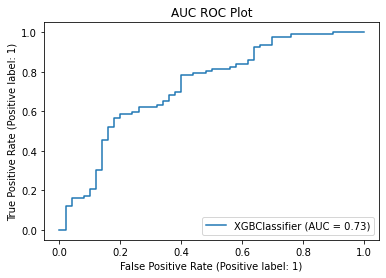

In [74]:
# auc roc plot
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

# auc roc plot
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(x_train, y_train)

pred = clf.predict(x_test)
plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()


In [75]:
# Saving the Model

import joblib
joblib.dump(clf, "Loan_Application_Status_Project.pkl")

['Loan_Application_Status_Project.pkl']